In [17]:
import numpy as np
from scipy.io.wavfile import write
import matplotlib.pyplot as plt

# Helper function to generate a sine wave with harmonics
def generate_tone_with_harmonics(frequency, duration_s, sample_rate=44100, amplitude=0.5, harmonics=[1.0, 0.5, 0.25]):
    """
    Generate a sine wave with added harmonics.
    :param frequency: Fundamental frequency in Hz
    :param duration_s: Duration in seconds
    :param sample_rate: Sampling rate in Hz
    :param amplitude: Base amplitude of the wave
    :param harmonics: List of harmonic amplitudes (relative to the base amplitude)
    :return: NumPy array of the tone with harmonics
    """
    t = np.linspace(0, duration_s, int(sample_rate * duration_s), endpoint=False)
    wave = np.zeros_like(t)
    for i, harmonic_amplitude in enumerate(harmonics):
        wave += harmonic_amplitude * amplitude * np.sin(2 * np.pi * frequency * (i + 1) * t)
    return wave

# Function to create a sequence of individual tones
def create_tone_sequence(frequencies, duration_s, sample_rate=44100, amplitude=0.5, harmonics=[1.0, 0.5, 0.25], silence_duration_s=0.5):
    """
    Create a sequence of individual tones with silence in between.
    :param frequencies: List of frequencies in Hz
    :param duration_s: Duration of each tone in seconds
    :param sample_rate: Sampling rate in Hz
    :param amplitude: Base amplitude of the tones
    :param harmonics: List of harmonic amplitudes
    :param silence_duration_s: Duration of silence between tones in seconds
    :return: NumPy array of the tone sequence
    """
    tone_sequence = []
    silence = np.zeros(int(sample_rate * silence_duration_s))  # Silence array
    for freq in frequencies:
        tone = generate_tone_with_harmonics(freq, duration_s, sample_rate, amplitude, harmonics)
        tone_sequence.append(tone)
        tone_sequence.append(silence)  # Append silence after each tone
    return np.concatenate(tone_sequence)

# Function to create a chord with harmonics
def create_chord_with_harmonics(frequencies, duration_s, sample_rate=44100, amplitude=0.5, harmonics=[1.0, 0.5, 0.25]):
    """
    Create a chord by summing up tones with harmonics.
    :param frequencies: List of frequencies in Hz
    :param duration_s: Duration in seconds
    :param sample_rate: Sampling rate in Hz
    :param amplitude: Base amplitude of the chord
    :param harmonics: List of harmonic amplitudes
    :return: NumPy array of the chord
    """
    chord = np.zeros(int(sample_rate * duration_s))
    for freq in frequencies:
        chord += generate_tone_with_harmonics(freq, duration_s, sample_rate, amplitude, harmonics)
    chord /= len(frequencies)  # Normalize to prevent clipping
    return chord

# Parameters
sample_rate = 44100  # Sampling rate
amplitude = 0.5  # Volume level
tone_duration = 2.0  # Duration of each tone in seconds
chord_duration = 2.0  # Duration of each chord in seconds
silence_duration = 0.5  # Silence duration between tones
harmonics = [1.0, 0.5, 0.25]  # Fundamental + 2 harmonics

# Frequencies for the chords
consonant_frequencies = [261.63, 329.63, 392.00]  # C4, E4, G4
dissonant_frequencies = [261.63, 277.18, 293.66]  # C4, C#4, D4

# Generate tone sequences and chords
# Consonant chord
consonant_tone_sequence = create_tone_sequence(consonant_frequencies, tone_duration, sample_rate, amplitude, harmonics, silence_duration)
consonant_chord = create_chord_with_harmonics(consonant_frequencies, chord_duration, sample_rate, amplitude, harmonics)
consonant_file = np.concatenate((consonant_tone_sequence, consonant_chord))

# Dissonant chord
dissonant_tone_sequence = create_tone_sequence(dissonant_frequencies, tone_duration, sample_rate, amplitude, harmonics, silence_duration)
dissonant_chord = create_chord_with_harmonics(dissonant_frequencies, chord_duration, sample_rate, amplitude, harmonics)
dissonant_file = np.concatenate((dissonant_tone_sequence, dissonant_chord))

# Save the audio files
write("consonant_chord_with_harmonics.wav", sample_rate, (consonant_file * 32767).astype(np.int16))
write("dissonant_chord_with_harmonics.wav", sample_rate, (dissonant_file * 32767).astype(np.int16))

print("Audio files saved as 'consonant_chord_with_harmonics.wav' and 'dissonant_chord_with_harmonics.wav'.")



Audio files saved as 'consonant_chord_with_harmonics.wav' and 'dissonant_chord_with_harmonics.wav'.


In [18]:
# Original frequencies
consonant_frequencies = [261.63, 329.63, 392.00] # C4, E4, G4

# Divide each frequency by the first frequency
normalized_frequencies = [freq / consonant_frequencies[0] for freq in consonant_frequencies]

print("Normalized Frequencies:", normalized_frequencies)


Normalized Frequencies: [1.0, 1.2599090318388564, 1.4982991247181134]


In [19]:
# Original frequencies
dissonant_frequencies = [261.63, 277.18, 293.66]  # C4, C#4, D4

# Divide each frequency by the first frequency
normalized_frequencies = [freq / dissonant_frequencies[0] for freq in dissonant_frequencies]

print("Normalized Frequencies:", normalized_frequencies)

Normalized Frequencies: [1.0, 1.059435080074915, 1.122424798379391]


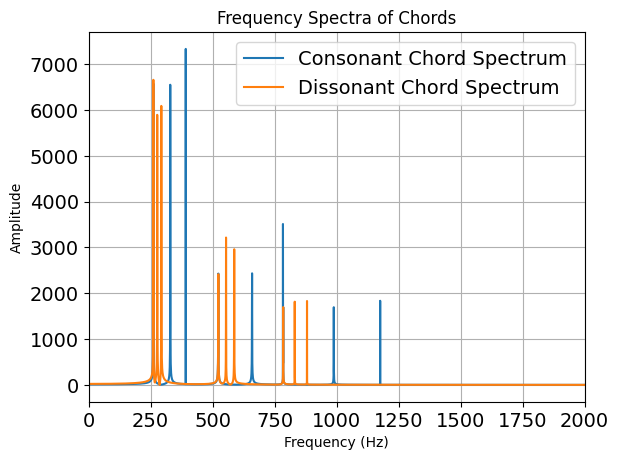

In [16]:
# Consonant chord spectrum
spectrum = np.abs(np.fft.rfft(consonant_chord))
freqs = np.fft.rfftfreq(len(consonant_chord), 1 / sample_rate)
plt.plot(freqs, spectrum, label="Consonant Chord Spectrum")

# Dissonant chord spectrum
spectrum = np.abs(np.fft.rfft(dissonant_chord))
freqs = np.fft.rfftfreq(len(dissonant_chord), 1 / sample_rate)
plt.plot(freqs, spectrum, label="Dissonant Chord Spectrum")

plt.title("Frequency Spectra of Chords")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.legend()

# Legend and ticks with larger fonts
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14) 

plt.xlim(0, 2000)  # Limit x-axis for clarity
plt.grid()
plt.show()